In [3]:
import os
import numpy as np

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

img_size = 128

start_path = './dices'
train_path = f"{start_path}/train/"
valid_path = f"{start_path}/valid/"

classes = ['d10', 'd12', 'd20', 'd4', 'd6', 'd8', 'dicesback']

def preprocess(X, rescale=255):
    
    if rescale:
        X = X*1./rescale
        return X

    return X


def get_batches(path, classes, batch_size=128):

    img_gen = ImageDataGenerator(preprocessing_function=preprocess)

    batch_dataset = img_gen.flow_from_directory(directory=train_path,
                                                target_size=(img_size, img_size),
                                                classes=classes,
                                                class_mode='categorical',
                                                shuffle=True,
                                                batch_size=batch_size)

    return batch_dataset


def get_mean_img(folder, img_size):

    mean_img = np.zeros((img_size, img_size, 3))
    files = os.listdir(folder)

    for file in files:
        img = load_img(os.path.join(folder, file), target_size=(img_size, img_size))
        image = np.array(img, dtype=np.float32)/len(files)
        mean_img = mean_img + image

    return mean_img / 255


def plot_mean_img(path, title):

    folders_dict = {}
    files_dict = {}

    for dice in classes:
        folders_dict[dice] = os.path.join(path, dice)
        files_dict[dice] = os.listdir(folders_dict[dice])
        
    mean_img = np.zeros((len(classes), img_size, img_size, 3))

    fig, axes = plt.subplots(1, len(classes), figsize=(12, 3))
    fig.suptitle(f"{title} dataset - mean image for dice class")

    for i, dice in enumerate(classes):

        mean_img[i] = get_mean_img(folders_dict[dice], img_size)
        axes[i].imshow(mean_img[i])
        axes[i].set_title(dice)

    plt.tight_layout()

    return mean_img

    
def plot_samples(folder):
    
    batch = get_batches(folder, classes)
    imgs = next(batch)

    fig, axes = plt.subplots(4, 8, figsize=(16,12))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(imgs[0][i])
        ax.set_xlabel(imgs[1][i])
        
    plt.tight_layout()

Found 15041 images belonging to 7 classes.


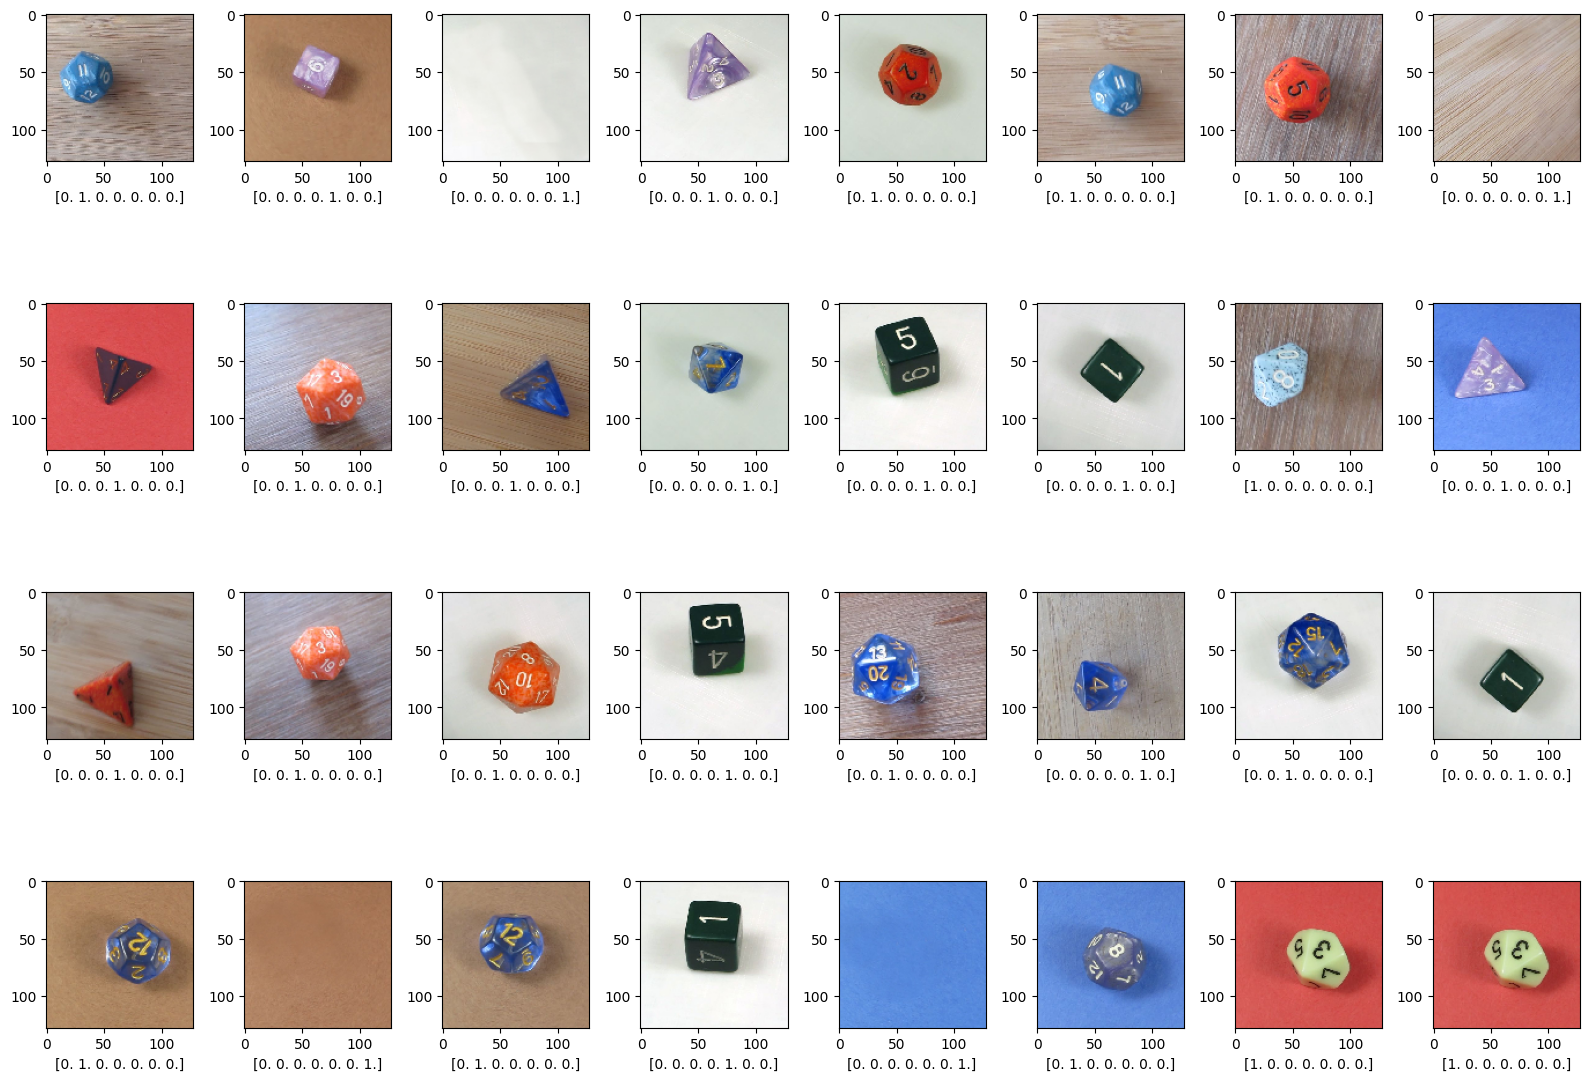

In [4]:
plot_samples(train_path)

Found 1722 images belonging to 1 classes.
Found 1691 images belonging to 1 classes.
Found 3346 images belonging to 1 classes.
Found 1947 images belonging to 1 classes.
Found 4046 images belonging to 1 classes.
Found 1532 images belonging to 1 classes.
Found 757 images belonging to 1 classes.


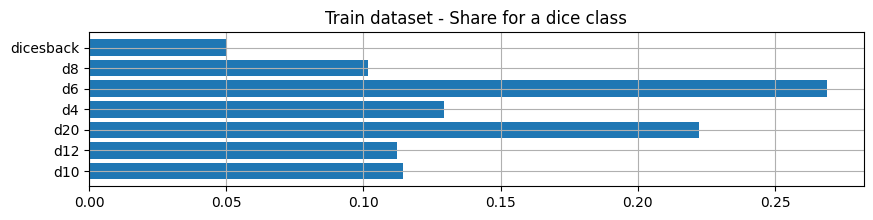

In [5]:
train_samples = [get_batches(path=train_path, classes=[dice]).samples for dice in classes]

train_shares = np.array(train_samples)/np.sum(train_samples)

plt.figure(figsize=(10,2))
plt.barh(classes, width=train_shares)
plt.grid()
plt.title("Train dataset - Share for a dice class")
plt.show()

Found 15041 images belonging to 7 classes.


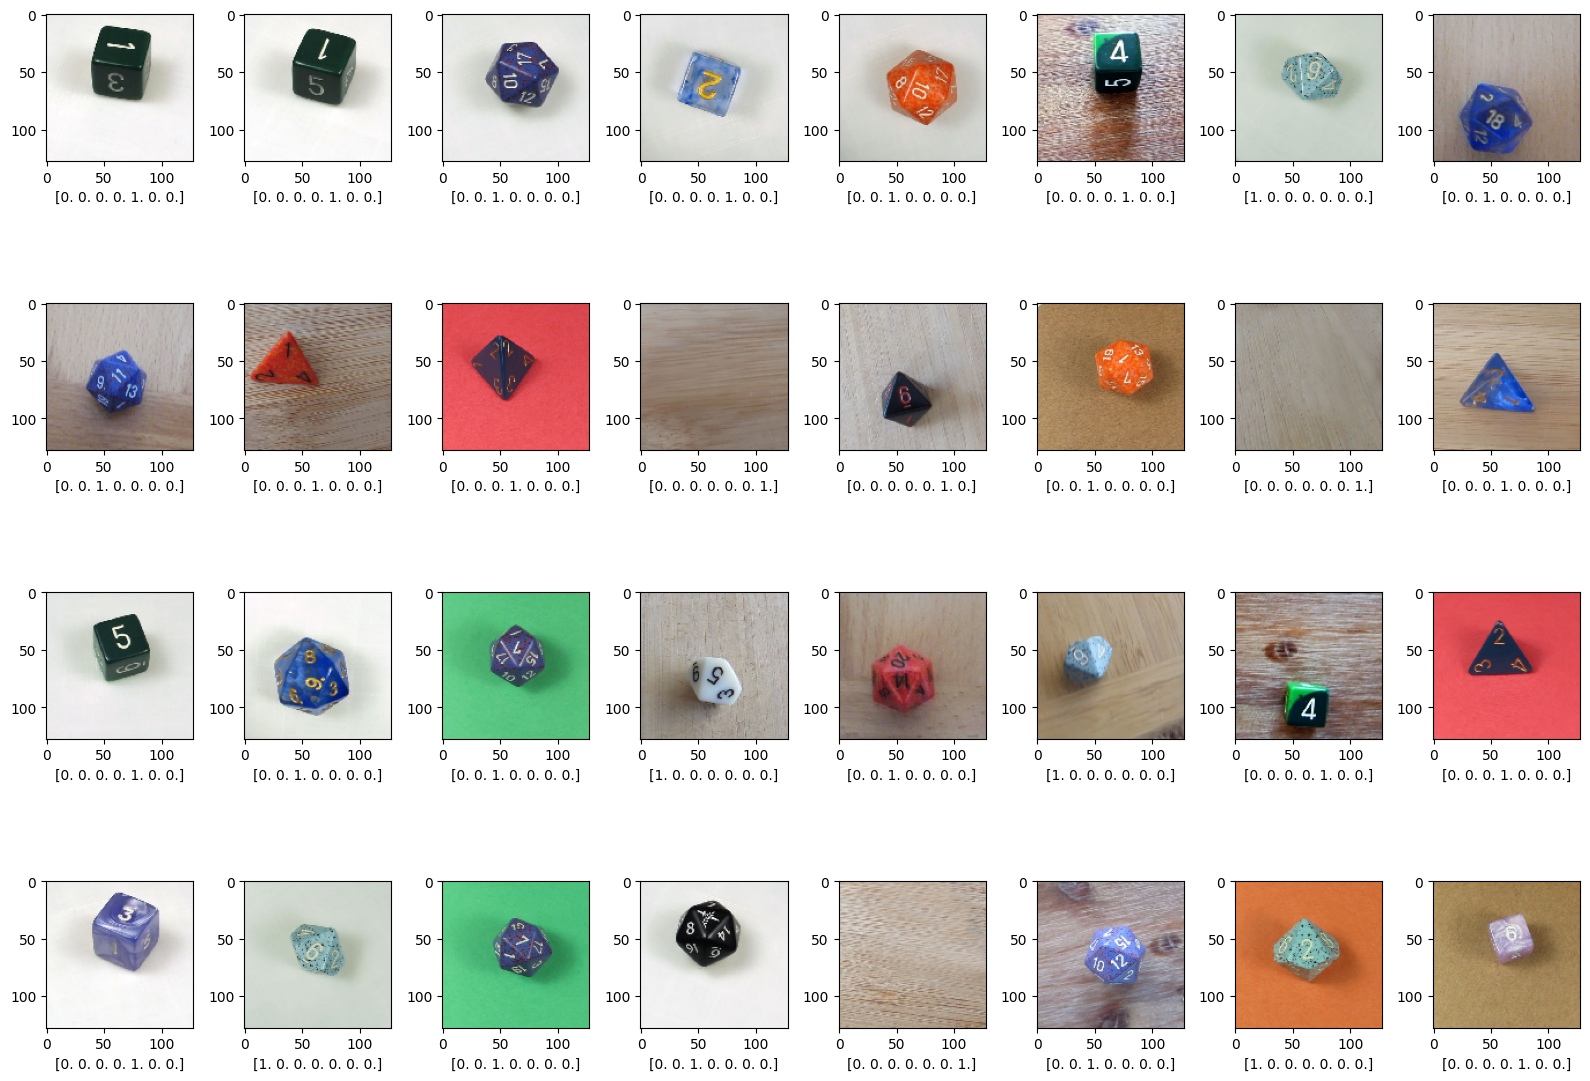

In [6]:
plot_samples(valid_path)

Found 1722 images belonging to 1 classes.
Found 1691 images belonging to 1 classes.
Found 3346 images belonging to 1 classes.
Found 1947 images belonging to 1 classes.
Found 4046 images belonging to 1 classes.
Found 1532 images belonging to 1 classes.
Found 757 images belonging to 1 classes.


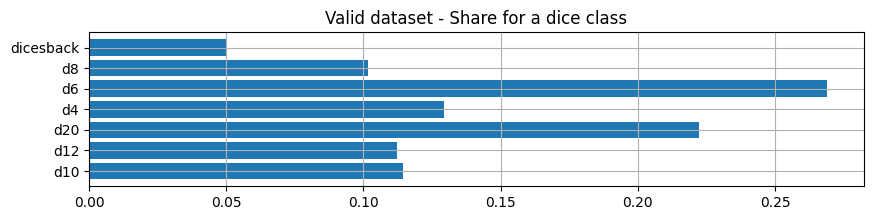

In [7]:
valid_samples = [get_batches(path=valid_path, classes=[dice]).samples for dice in classes]

valid_shares = np.array(valid_samples)/np.sum(valid_samples)

plt.figure(figsize=(10,2))
plt.barh(classes, width=valid_shares)
plt.grid()
plt.title("Valid dataset - Share for a dice class")
plt.show()

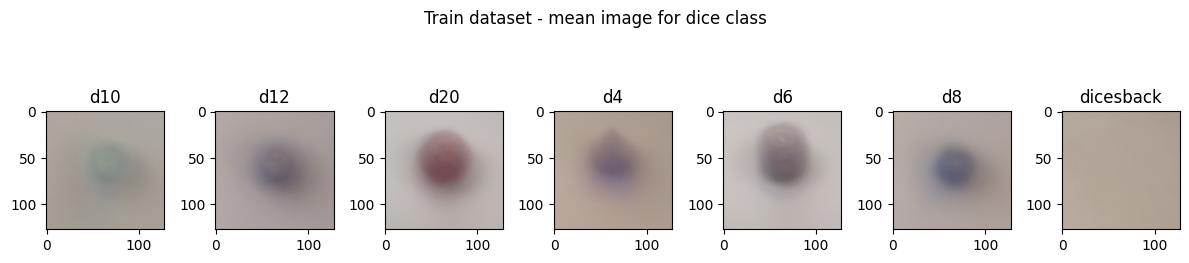

In [8]:
train_mean_imgs = plot_mean_img(train_path, "Train")

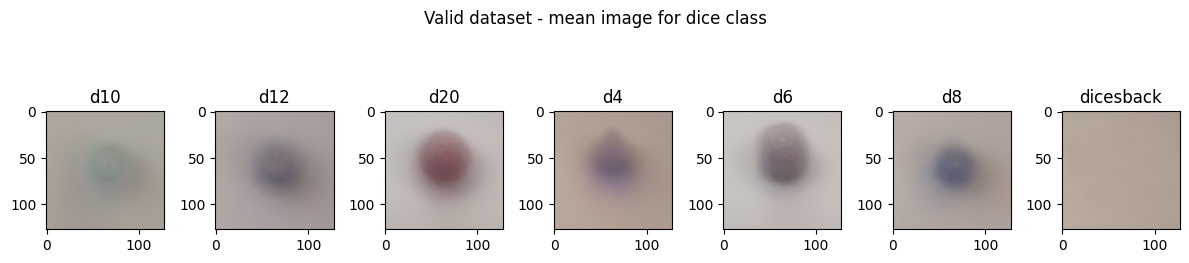

In [9]:
valid_mean_imgs = plot_mean_img(train_path, "Valid")

IndexError: index 7 is out of bounds for axis 0 with size 7

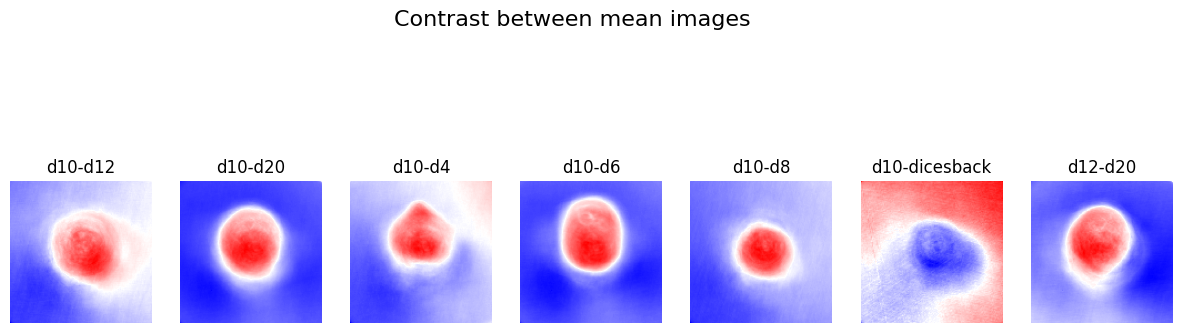

In [10]:
# Contrast between means

fig, axs = plt.subplots(1, len(classes), figsize=(15, 5))
fig.suptitle('Contrast between mean images', fontsize=16)
count = -1

for idx_1 in range(len(classes)):
    for idx_2 in range(len(classes)):
        if idx_1 >= idx_2: 
            continue
        count += 1
        contrast_image = train_mean_imgs[idx_1] - train_mean_imgs[idx_2]
        axs[count].imshow(np.mean(contrast_image, axis=-1), cmap='bwr')
        axs[count].set_title(f'{classes[idx_1]}-{classes[idx_2]}')
        axs[count].axis('off')